χ_max= 0.25358577702937535 s_max= 0.00015419748760563592
χ_max= 0.23443317813113898 s_max= 0.00029020662366933703
χ_max= 0.2269755274767271 s_max= 0.00042466042481110376
χ_max= 0.2228899874862172 s_max= 0.0005584158919116013
χ_max= 0.22026495284646616 s_max= 0.0006917615252647446
χ_max= 0.218428198369892 s_max= 0.0008248498250249749
χ_max= 0.2171391261005391 s_max= 0.0011651173317853264
χ_max= 0.21601350700432861 s_max= 0.001326494659833122
χ_max= 0.2151940944542365 s_max= 0.0014878664878745767
χ_max= 0.21444321491856344 s_max= 0.0016489833156605924
χ_max= 0.21102965004593416 s_max= 0.0032576665910226247
χ_max= 0.20945851696790477 s_max= 0.0039962589964597445
χ_max= 0.20868018116221368 s_max= 0.005313345313548312
χ_max= 0.20835576833490502 s_max= 0.006631356631560868
χ_max= 0.20766162164214003 s_max= 0.007941687941893772
χ_max= 0.2075868935771788 s_max= 0.009258745925618986
χ_max= 0.20728007311620572 s_max= 0.010569837236711167
χ_max= 0.20701941039091767 s_max= 0.01187984688005489
χ_ma

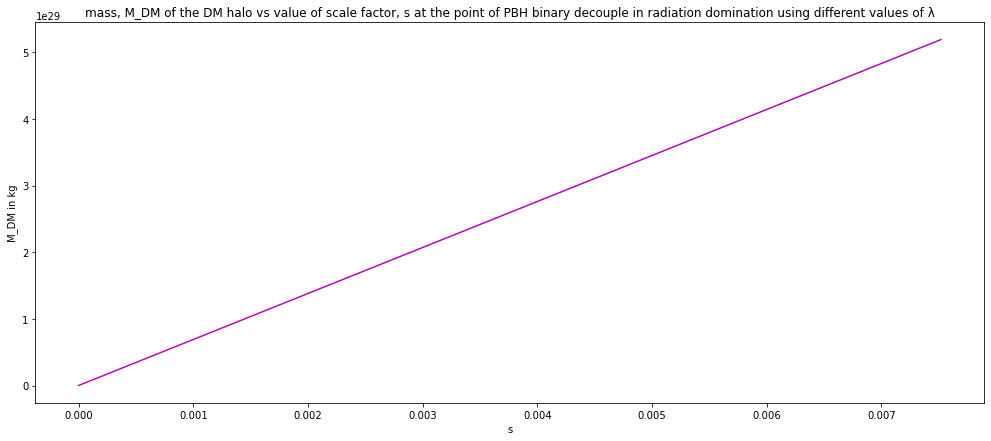

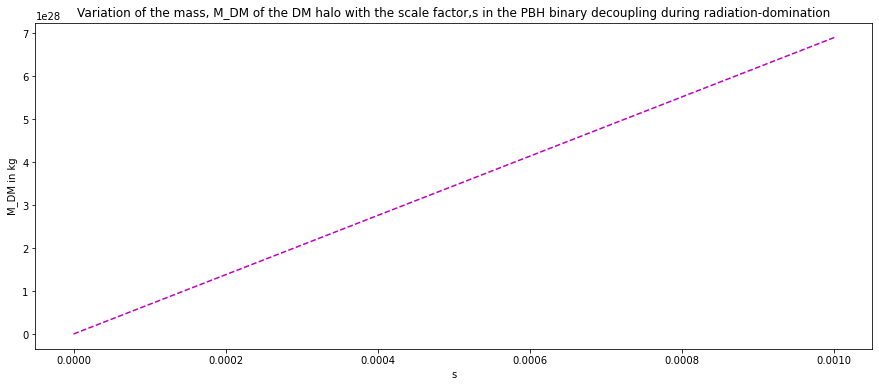

M_DM at the point of PBH binary decouple using λ_0 = 0.009  is = 7.3804e+27 kg


In [4]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping in the radiation dominated era using eqs.(43) & (50) in reference pdf "PBH binary".

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math

π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) #eq.(57) in reference pdf "PBH binary".
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)



λ_3_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.002, 0.003, 0.004,
          0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for λ_0 in λ_3_list:
    def s_max(λ_0):
        def w(v,t,λ_0):
            return [v[1], ((t*v[1]-v[0])/(t**2))-((v[0]*(t**2))/(λ_r(t)*((v[0]**2+b**2)**(3/2))))] 
                           # eq.(50) in reference pdf "PBH binary".
        separation0= [1e-12,1]
        b= 1e-6
        x0= [1e-12,1]
        ts= np.linspace(1e-12,((5*λ_0)/3),1000000) 
        vs= odeint(w,x0,ts,args=(λ_0,))
        xs= vs[:,0]
        Ts=ts/λ_0
        Xs=xs/λ_0
        χ_max=np.max(Xs)
        s_max = ts[np.argmax(Xs)]
        print("χ_max=", χ_max, "s_max=", s_max)
        λ_0+=0.0001
        return  s_max
    
s_max_list=np.zeros(len(λ_3_list))

for i, λ_0 in enumerate(λ_3_list):
     s_max_list[i] = (λ_0* s_max(λ_0))
print("λ_0=",λ_3_list)
print("s=",s_max_list)


def M_r(s):    #eq.(43) in reference pdf "PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s) 

M_r_list=np.zeros(len(s_max_list)) 
for i, s in enumerate(s_max_list):
     M_r_list[i] = M_r(s)
print("Mass of the DM halos at the point of PBH binary decouple = ", M_r_list," in kg")
plt.figure(figsize=(17,7))
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.plot(s_max_list,M_r_list,'m')
plt.title('mass, M_DM of the DM halo vs value of scale factor, s at the point of PBH binary decouple in radiation domination using different values of λ')


M2_r = np.vectorize(M_r) 
s=np.linspace(1e-12,1e-3,100000)
plt.figure(figsize=(15,6))
plt.plot(s, M2_r(s),'m--')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo with the scale factor,s in the PBH binary decoupling during radiation-domination')
plt.show() 

print("M_DM at the point of PBH binary decouple using λ_0 = 0.009  is =",'%.4e'%M2_r(1.06918622e-04),"kg")
# using s[8] = 1.06918622e-04 corresponding to λ_0=0.009.(just picked the value of λ_0 keep analogy with the
# reference research paper "The merger rate of primordial-black-hole binaries".)

λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
s= [0.36908424 0.85989114 1.57926016 2.543984   3.76984478 5.27171453]
Mass of the DM halos at the point of PBH binary decouple =  [2.41370248e+31 5.31800968e+31 9.17254886e+31 1.38610147e+32
 1.93039049e+32 2.54483718e+32]  in kg


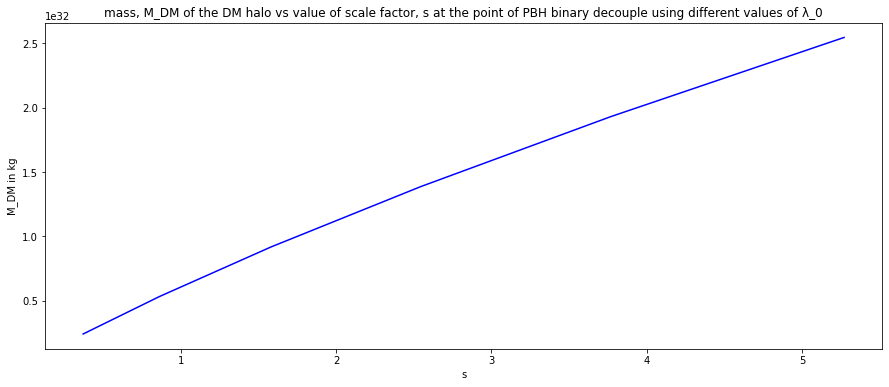

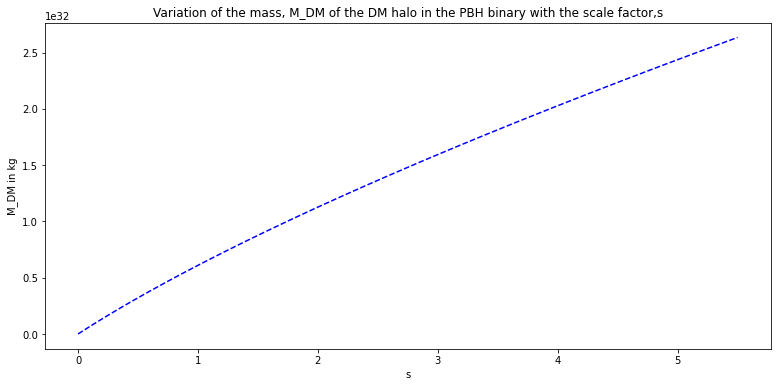

M_DM at the point of PBH binary decouple using λ_0 = 1  is = 2.4137e+31 kg


In [74]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42) & (47) in reference 
# pdf "PBH binary" .






def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                    #eq.(56) in reference pdf "PBH binary".

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_1*k(s)
   
λ_4_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_1 in λ_4_list:
    def s_max(λ_1):
        def j(n,p,λ_1):
            return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*λ(p)
            *((n[0]**2+b**2)**(3/2))))]      #eq.(47) in reference pdf "PBH binary".
        z0= [1e-12,1]
        b= 1e-6
        ps= np.linspace(1e-12,(6*λ_1/3),10000000) 
        ns= odeint(j,z0,ps,args=(λ_1,))
        zs= ns[:,0]
        Ps=ps/λ_1
        Zs=zs/λ_1
        χ_max=np.max(Zs)
        s_max = ps[np.argmax(Zs)]
        λ_1+=0.5
        return  s_max
        
s_max_list=np.zeros(len(λ_4_list))

for i, λ_1 in enumerate(λ_4_list):
     s_max_list[i] = (λ_1* s_max(λ_1))
print("λ_0=",λ_4_list)
print("s=",s_max_list)




def M(s):               #eq.(42) in reference pdf "PBH binary".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))
                                                                          +(4/3)))


M_list=np.zeros(len(s_max_list)) 
for i, s in enumerate(s_max_list):
     M_list[i] = M(s)
print("Mass of the DM halos at the point of PBH binary decouple = ", M_list," in kg")
plt.figure(figsize=(15,6))
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.plot(s_max_list,M_list,'b')
plt.title('mass, M_DM of the DM halo vs value of scale factor, s at the point of PBH binary decouple using different values of λ_0')


M2 = np.vectorize(M) 
s=np.linspace(1e-12,5.5,100000)
plt.figure(figsize=(13,6))
plt.plot(s, M2(s),'b--')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo in the PBH binary with the scale factor,s')
plt.show() 


print("M_DM at the point of PBH binary decouple using λ_0 = 1  is =",'%.4e'%M2(0.36908424),"kg") 
# using s[0] =0.36908424 corresponding to λ_0=1.

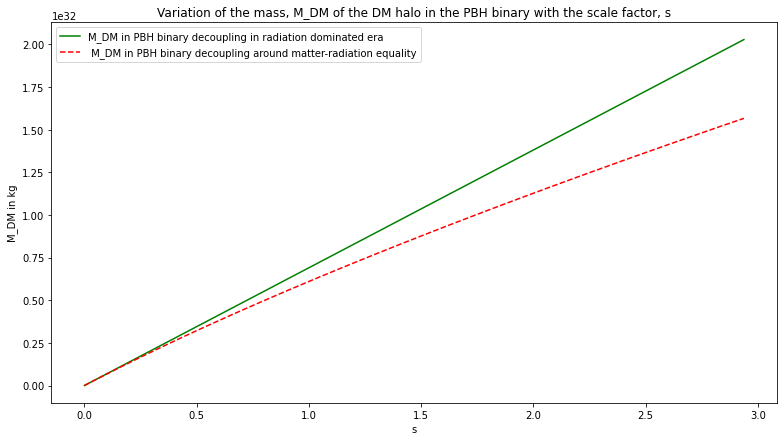

In [50]:
# Comparison of the mass, M_DM of the DM halos in equal mass PBH binary decoulping in radiation domination
# with mass, M_DM of the DM halos in equal mass PBH binary decoupling around matter-radiation equality.



def M_r(s):       #eq.(43) in reference pdf "PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def M_(s):        #eq.(57) in reference pdf "PBH binary".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))
                                                                          +(4/3)))

M2 = np.vectorize(M) 
s=np.linspace(1e-12,(1e4*a_eq),10000000)   # a_eq=2.9374e-4
plt.figure(figsize=(13,7))
plt.plot(s, M_r(s),'g')

plt.plot(s, M2(s),'r--')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo in the PBH binary with the scale factor, s')
plt.legend(["M_DM in PBH binary decoupling in radiation dominated era"," M_DM in PBH binary decoupling around matter-radiation equality"])
plt.show()

In [5]:
# Analytical estimate of 
#  a.) turnaround radius of the DM shell at matter-radiation equlaity, t_eq=1.5924e12s.
#  b.) the initial  radius of the shell of DM halo which just truns around at the point of
#      matter-radiation equality i.e. t_eq=1.5924e12s.


t_i=2.358e5          # in units of seconds
t_eq=1.59246e12      # in units of seconds


r_ta=(4*G*M_PBH*(t_eq**2))**(1/3) 
# eq.(4) reference research paper "WIMPs and stellar-mass primordial black holes are incompatible"

print("r_ta=",'%.4e' % r_ta,"m")

#using the relation for the analytical estimate of the turnaround radius, r_ta from a given value of r_i 
# i.e. r_ta= (r_i^4)/(16*G*M_PBH*t_i^2)

r_i=(16*G*M_PBH*r_ta*(t_i**2))**(1/4)     
                                                
 
print("r_i=",'%.4e'% r_i,"m")

r_ta= 4.0748e+15 m
r_i= 2.2175e+12 m


r_ta= 7.1442e+15 m , t_ta= 3.0000e+12 s


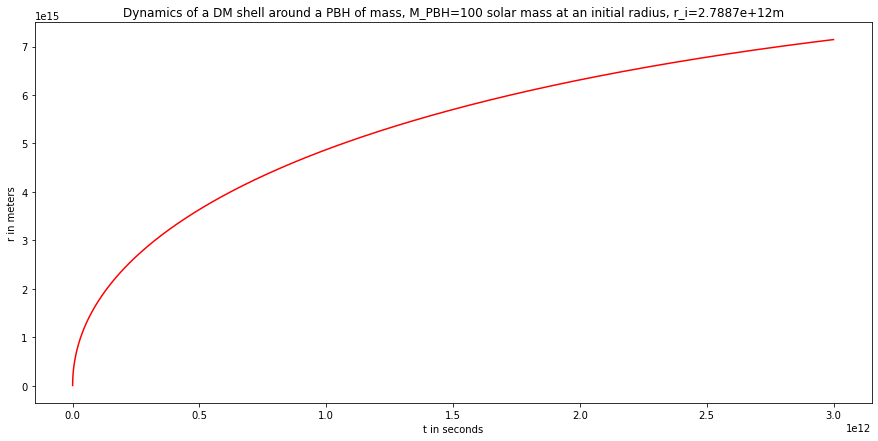

In [6]:
# Plot showing the dynamics of a shell of DM halo at an initial radius of r_i= 2.7887e+12 m
# from the PBH of mass, M_PBH=100 solar mass.

# (The aim is to check whether the shell of DM halo at initial radius of  r_i= 2.7887e+12 m turns 
#  around the PBH at matter-radiation equlaity,t_eq=1.59246e12s or not.)


def h(m,k):
    return [m[1], (((-G*M_PBH)/((m[0]**2))) - (m[0]/(4*k**2)))]  
r_i=2.7887e+12 
t_i=2.358e5 
y0= [r_i,(r_i/(2*t_i))]  

ks= np.linspace(2.358e5,3e12,50000)
ms= odeint(h,y0,ks)
ys= ms[:,0]
y_max= (np.max(ys))
k_max = ks[np.argmax(ys)]
plt.figure(figsize=(15,7))
plt.plot(ks,ys,'r')
print("r_ta=",'%.4e'%y_max,"m",",","t_ta=",'%.4e'% k_max,"s")
plt.xlabel('t in seconds')
plt.ylabel('r in meters')  
plt.title('Dynamics of a DM shell around a PBH of mass, M_PBH=100 solar mass at an initial radius, r_i=2.7887e+12m')
plt.show()

r_ta= 7.3252e+15 m , t_ta= 3.0000e+12 s


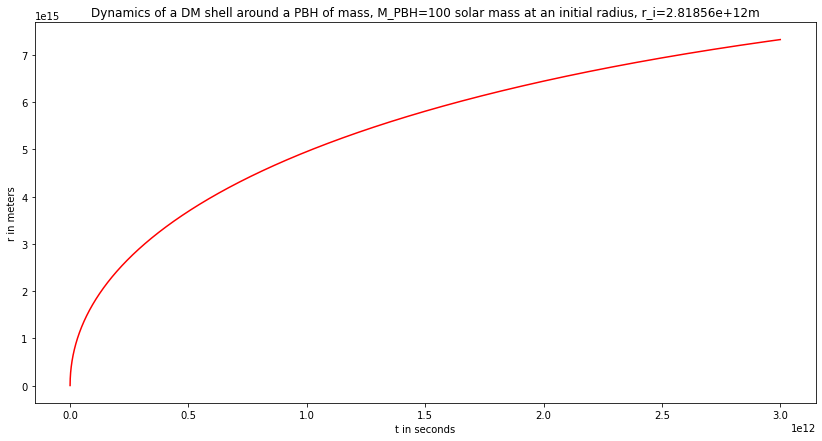

In [7]:
# As the main aim is to find out about the shell of DM halo at given initial radius ,r_i from the PBH
# which just turns around the PBH at matter-radiation equlaity, t_eq=1.59246e12s so, I tried to play around
# the value of  analytically estimated value of r_i= 2.7887e+12m to find out which shell has the 
# turn around time closest to  matter-radiation equlaity, t_eq=1.59246e12s.

def h(m,k):
    return [m[1], (((-G*M_PBH)/((m[0]**2))) - (m[0]/(4*k**2)))]  
r_i=2.81856e+12 
t_i=2.358e5 
y0= [r_i,(r_i/(2*t_i))]  

ks= np.linspace(2.358e5,3e12,50000)
ms= odeint(h,y0,ks)
ys= ms[:,0]
y_max= (np.max(ys))
k_max = ks[np.argmax(ys)]
plt.figure(figsize=(14,7))
plt.plot(ks,ys,'r')
print("r_ta=",'%.4e'%y_max,"m",",","t_ta=",'%.4e'% k_max,"s")
plt.xlabel('t in seconds')
plt.ylabel('r in meters')  
plt.title('Dynamics of a DM shell around a PBH of mass, M_PBH=100 solar mass at an initial radius, r_i=2.81856e+12m')
plt.show()


#The numerical value of the turn around time,t_ta for this shell is very close to t_eq.

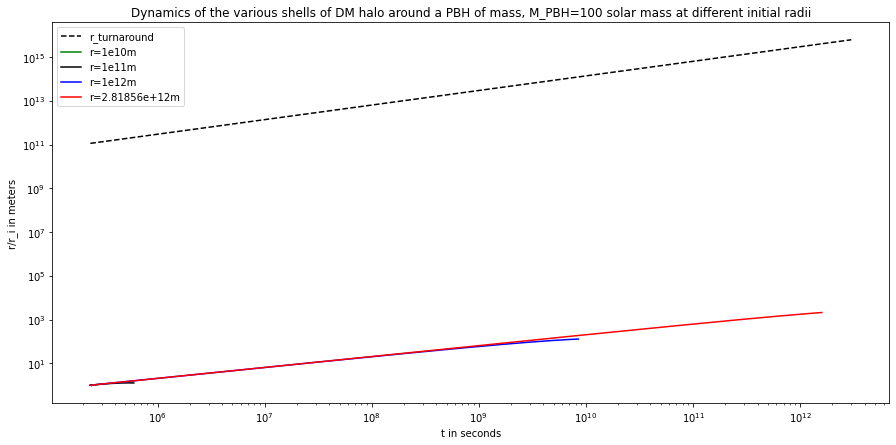

In [8]:
def j(n,p):
    return [n[1], (((-G*M_PBH)/((n[0]**2))) - (n[0]/(4*p**2)))]
z0= [1e10,2.12044e4]   #with initial distance r_i=1e10m
ps= np.linspace(2.358e5,2.4e5,2000000) 
ns= odeint(j,z0,ps)
zs= (ns[:,0])


def f(u,w):
    return [u[1], (((-G*M_PBH)/((u[0]**2))) - (u[0]/(4*w**2)))]
r0= [1e11,2.12044e5]        #with initial distance r_i=1e11m
ws= np.linspace(2.358e5,6e5,200000)
us= odeint(f,r0,ws)
rs= (us[:,0])


def h(m,k):
    return [m[1], (((-G*M_PBH)/((m[0]**2))) - (m[0]/(4*k**2)))]                                          
y0= [1e12,2.12044e6]             #with initial distance r_i=1e12m
ks= np.linspace(2.358e5,8.5e9,50000)
ms= odeint(h,y0,ks)
ys= (ms[:,0])


def g(v,t):
    return [v[1], (((-G*M_PBH)/((v[0]**2))) - (v[0]/(4*t**2)))]
x0= [2.81856e+12 ,5.9766e+06]            #with initial distance r_i=1e2.81856e+12m
ts= np.linspace(2.358e5,1.5924e12,2000000) 
vs= odeint(g,x0,ts)
xs= (vs[:,0])

def r(t):
    return ((4*G*M_PBH*(t**(2)))**(1/3))
t= np.linspace(2.358e5,3e12,200000)

plt.figure(figsize=(15, 7))
plt.loglog(t,r(t),'k--')
plt.loglog(ps,zs,'g')
plt.loglog(ws,rs,'k')
plt.loglog(ks,ys,'b')
plt.loglog(ts,xs,'r')

plt.xlabel('t in seconds')
plt.ylabel('r in meters')  
plt.legend(["r_turnaround","r=1e10m","r=1e11m","r=1e12m","r=2.81856e+12m"]) 
plt.title('Dynamics of the various shells of DM halo around a PBH of mass, M_PBH=100 solar mass at different initial radii')
plt.show()

